<a href="https://colab.research.google.com/github/engogola/Ml--project-Analysis-of-KPL-FKF-2013-2023-/blob/main/Ml_Kenya_Premier_League_wins_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**

This is a Machine learning project that predicts the number of wins for each team in the Kenya Premier League (KPL).The project wishes to do anlysis of the last 10 seasons in Kenya premier league (2013-2023)

**Data**

Do a webscarpping to obtain the datasets for the 10 seasons.

The data was obtained from https://www.fctables.com/kenya/premier-league/ and https://en.wikipedia.org/wiki/Kenyan_Premier_League

Data Dictionary

In [3]:
# load neccessary libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#ignore all warning
warnings.filterwarnings('ignore')

Webscraping

In [7]:
# Function to extract and save data from a given URL
def extract_and_save(url, filename):
    response = requests.get(url)

    # Check if the requests is successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
          # Extract the H1 tag information
        season_name = soup.find('h1').text.strip()
        # Identify the HTML element containing the table
        table = soup.find('table')
        # Extract data from the table
        rows = table.find_all('tr')
        data = []
        for row in rows:
            cols = row.find_all(['td', 'th'])
            cols = [col.text.strip() for col in cols]
            data.append(cols)
        # Write data to CSV
        with open(filename, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
             # Add a new column to the data with the season name
            csv_writer.writerow(['Season'] + data[0])
            for row in data[1:]:
                csv_writer.writerow([season_name] + row)

        print(f"Data extracted and saved to {filename}")

        # URLs for the 2013-2023 season
url_2013  =  "https://www.fctables.com/kenya/premier-league/2013/"
url_2014  =  "https://www.fctables.com/kenya/premier-league/2014/"
url_2015  =  "https://www.fctables.com/kenya/premier-league/2015/"
url_2016  =  "https://www.fctables.com/kenya/premier-league/2016/"
url_2017  =  "https://www.fctables.com/kenya/premier-league/2017/"
url_2018  =  "https://www.fctables.com/kenya/premier-league/2018/"
url_2018_2019 = "https://www.fctables.com/kenya/premier-league/2018_2019/"
url_2019_2020 = "https://www.fctables.com/kenya/premier-league/2019_2020/"
url_2020_2021 = "https://www.fctables.com/kenya/premier-league/2020_2021/"
url_2021_2022 =  "https://www.fctables.com/kenya/premier-league/2021_2022/"
url_2022_2023 =  "https://www.fctables.com/kenya/premier-league/2022_2023/"

# Extract and save data for both seasons
extract_and_save(url_2013, 'kpl_league_2013.csv')
extract_and_save(url_2014, 'kpl_league_2014.csv')
extract_and_save(url_2015, 'kpl_league_2015.csv')
extract_and_save(url_2016, 'kpl_league_2016.csv')
extract_and_save(url_2017, 'kpl_league_2017.csv')
extract_and_save(url_2018, 'kpl_league_2018.csv')
extract_and_save(url_2018_2019, 'kpl_league_2018_2019.csv')
extract_and_save(url_2019_2020, 'kpl_league_2019_2020.csv')
extract_and_save(url_2020_2021, 'kpl_league_2020_2021.csv')
extract_and_save(url_2021_2022, 'kpl_league_2021_2022.csv')
extract_and_save(url_2022_2023, 'kpl_league_2022_2023.csv')

# Load data into DataFrames
data_2021_2022 = pd.read_csv('kpl_league_2021_2022.csv')
data_2020_2021 = pd.read_csv('kpl_league_2020_2021.csv')
data_2019_2020 = pd.read_csv('kpl_league_2019_2020.csv')
data_2018_2019 = pd.read_csv('kpl_league_2018_2019.csv')
data_2018 = pd.read_csv('kpl_league_2018.csv')
data_2017 = pd.read_csv('kpl_league_2017.csv')
data_2016 = pd.read_csv('kpl_league_2016.csv')
data_2015 = pd.read_csv('kpl_league_2015.csv')
data_2014 = pd.read_csv('kpl_league_2014.csv')
data_2013 = pd.read_csv('kpl_league_2013.csv')



Data extracted and saved to kpl_league_2013.csv
Data extracted and saved to kpl_league_2014.csv
Data extracted and saved to kpl_league_2015.csv
Data extracted and saved to kpl_league_2016.csv
Data extracted and saved to kpl_league_2017.csv
Data extracted and saved to kpl_league_2018.csv
Data extracted and saved to kpl_league_2018_2019.csv
Data extracted and saved to kpl_league_2019_2020.csv
Data extracted and saved to kpl_league_2020_2021.csv
Data extracted and saved to kpl_league_2021_2022.csv
Data extracted and saved to kpl_league_2022_2023.csv


In [21]:
print(kpl_data.shape)
kpl_data.head()

(172, 16)


,Season,Position,Team,GP,PTS,W,D,L,G+,G-,GD,last10matches(Wins),last10matches(Draws),last10matches(Losses),Goals_Score_Avg,Goals_Conceded_Avg
0,2021/2022,1,Kakamega Homeboyz,34,66,18,12,4,56,33,23,3,5,2,1.647059,0.970588
1,2021/2022,2,Tusker FC,33,63,18,9,6,40,17,23,6,4,0,1.212121,0.515152
2,2021/2022,3,Bandari,34,57,15,12,7,43,26,17,6,2,2,1.264706,0.764706
3,2021/2022,4,Gor Mahia,33,55,14,13,5,37,27,10,4,5,1,1.121212,0.818182
4,2021/2022,5,Nairobi City Stars,34,52,14,10,10,45,34,11,2,5,3,1.323529,1.000000


Do data cleaning;Remove unneccasry columns that we shall not need for our project

In [9]:
# Concatenate all the DataFrames into one
kpl_data = pd.concat([ data_2021_2022, data_2020_2021,
                      data_2019_2020, data_2018_2019, data_2018,
                      data_2017, data_2016, data_2015, data_2014,
                      data_2013], ignore_index=True)

# Now you can drop the columns
kpl_data.drop(['NG','H2H'],axis=1,inplace=True)

kpl_data.head()

,Season,#,Team,GP,PTS,W,D,L,G+,G-,GD,Form
0,Kenya KPL 2021/2022,1,Kakamega Homeboyz,34,66,18,12,4,56,33,23,W\nW\nL\nD\nW\nL\nD\nD\nD\nD
1,Kenya KPL 2021/2022,2,Tusker FC,33,63,18,9,6,40,17,23,W\nW\nD\nD\nW\nW\nW\nW\nD\nD
2,Kenya KPL 2021/2022,3,Bandari,34,57,15,12,7,43,26,17,L\nL\nD\nW\nW\nW\nW\nW\nD\nW
3,Kenya KPL 2021/2022,4,Gor Mahia,33,55,14,13,5,37,27,10,W\nD\nW\nD\nD\nD\nW\nL\nD\nW
4,Kenya KPL 2021/2022,5,Nairobi City Stars,34,52,14,10,10,45,34,11,D\nD\nL\nL\nD\nW\nD\nL\nW\nD


Obtain count of wins ,draws and losses from the last 10 matches

In [10]:
kpl_data['Form']=kpl_data['Form'].str.split('\n')
kpl_data['Form'] = kpl_data['Form'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

kpl_data['last10matches(Wins)'] = kpl_data['Form'].apply(lambda x: x.count('W') if isinstance(x, str) else 0)
kpl_data['last10matches(Draws)'] = kpl_data['Form'].apply(lambda x: x.count('D') if isinstance(x, str) else 0)
kpl_data['last10matches(Losses)'] = kpl_data['Form'].apply(lambda x: x.count('L') if isinstance(x, str) else 0)

kpl_data.drop('Form',axis=1,inplace=True)

kpl_data.head()

#Obtaining the years only from the Season column
kpl_data['Season']=kpl_data['Season'].str.split().str[-1]

#Renaming column # to position for easy readability
kpl_data.rename(columns={'#':'Position'},inplace=True)
kpl_data.head()

,Season,Position,Team,GP,PTS,W,D,L,G+,G-,GD,last10matches(Wins),last10matches(Draws),last10matches(Losses)
0,2021/2022,1,Kakamega Homeboyz,34,66,18,12,4,56,33,23,3,5,2
1,2021/2022,2,Tusker FC,33,63,18,9,6,40,17,23,6,4,0
2,2021/2022,3,Bandari,34,57,15,12,7,43,26,17,6,2,2
3,2021/2022,4,Gor Mahia,33,55,14,13,5,37,27,10,4,5,1
4,2021/2022,5,Nairobi City Stars,34,52,14,10,10,45,34,11,2,5,3


from matplotlib import pyplot as plt
_df_0['Position'].plot(kind='hist', bins=20, title='Position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GP'].plot(kind='hist', bins=20, title='GP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PTS'].plot(kind='hist', bins=20, title='PTS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['W'].plot(kind='hist', bins=20, title='W')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Team').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Position', y='GP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='GP', y='PTS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PTS', y='W', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='W', y='D', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Position']
  ys = series['GP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Position', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Position')
_ = plt.ylabel('GP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Position']
  ys = series['PTS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Position', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Position')
_ = plt.ylabel('PTS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Position']
  ys = series['W']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Position', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Position')
_ = plt.ylabel('W')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Position']
  ys = series['D']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Position', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Team')):
  _plot_series(series, series_name, i)
  fig.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Position')
_ = plt.ylabel('D')

from matplotlib import pyplot as plt
_df_13['Position'].plot(kind='line', figsize=(8, 4), title='Position')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['GP'].plot(kind='line', figsize=(8, 4), title='GP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['PTS'].plot(kind='line', figsize=(8, 4), title='PTS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['W'].plot(kind='line', figsize=(8, 4), title='W')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Position', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='GP', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='PTS', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Team'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='W', y='Team', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Feature Engineering
Obtaining Average for Goals scored  and conceded over the per season

In [11]:
kpl_data["Goals_Score_Avg"]=(kpl_data['G+']/kpl_data['GP'])
kpl_data["Goals_Conceded_Avg"]=(kpl_data['G-']/kpl_data['GP'])

#View the dataset the first 55 rows
kpl_data.head(55)

,Season,Position,Team,GP,PTS,W,D,L,G+,G-,GD,last10matches(Wins),last10matches(Draws),last10matches(Losses),Goals_Score_Avg,Goals_Conceded_Avg
0,2021/2022,1,Kakamega Homeboyz,34,66,18,12,4,56,33,23,3,5,2,1.647059,0.970588
1,2021/2022,2,Tusker FC,33,63,18,9,6,40,17,23,6,4,0,1.212121,0.515152
2,2021/2022,3,Bandari,34,57,15,12,7,43,26,17,6,2,2,1.264706,0.764706
3,2021/2022,4,Gor Mahia,33,55,14,13,5,37,27,10,4,5,1,1.121212,0.818182
4,2021/2022,5,Nairobi City Stars,34,52,14,10,10,45,34,11,2,5,3,1.323529,1.000000
5,2021/2022,6,AFC Leopards,33,49,12,13,8,43,35,8,5,3,2,1.303030,1.060606
6,2021/2022,7,Sofapaka,33,49,12,13,8,33,26,7,6,3,1,1.000000,0.787879
7,2021/2022,8,KCB,32,45,11,12,9,37,32,5,2,3,5,1.156250,1.000000
8,2021/2022,9,Kariobangi Sharks,34,45,12,9,13,44,41,3,2,2,6,1.294118,1.205882
9,2021/2022,10,Police FC,33,44,10,14,9,42,35,7,4,4,2,1.272727,1.060606


Exploratory Data Analysis

1)Which team has the most number of wins over the last 10 seasons

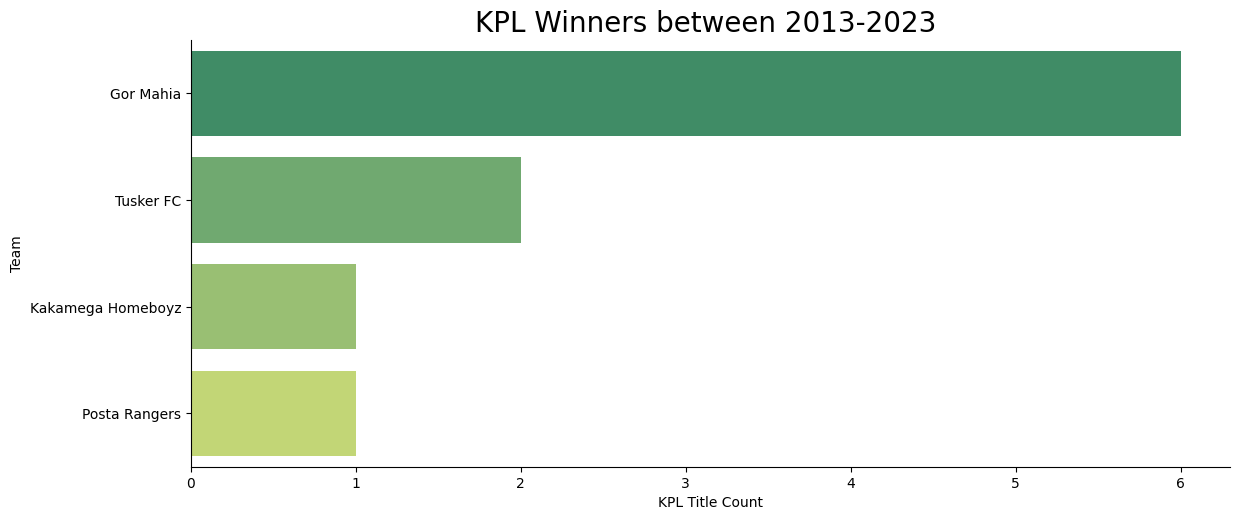

In [12]:
kpl_winners=kpl_data.loc[(kpl_data['Position']==1)]
kpl_Title_winners=kpl_winners['Team'].value_counts()
kpl_Title_winners

sns.catplot(y='Team',kind='count',data=kpl_winners,aspect=2.5,order=kpl_Title_winners.index,palette='summer')
plt.title('KPL Winners between 2013-2023 ',fontsize=20)
plt.xlabel('KPL Title Count');

2)Which team and season had the most points at the end of the league

In [13]:
kpl_winners=kpl_data.loc[(kpl_data['Position']==1)]

In [14]:
kpl_points=kpl_winners.sort_values('PTS',ascending=False)
kpl_points

,Season,Position,Team,GP,PTS,W,D,L,G+,G-,GD,last10matches(Wins),last10matches(Draws),last10matches(Losses),Goals_Score_Avg,Goals_Conceded_Avg
70,2018,1,Gor Mahia,34,75,23,6,5,71,31,40,5,1,4,2.088235,0.911765
88,2017,1,Gor Mahia,34,74,22,8,4,53,22,31,7,2,1,1.558824,0.647059
52,2018/2019,1,Gor Mahia,34,72,21,9,4,59,25,34,4,5,1,1.735294,0.735294
122,2015,1,Posta Rangers,33,71,21,8,4,45,15,30,7,1,2,1.363636,0.454545
0,2021/2022,1,Kakamega Homeboyz,34,66,18,12,4,56,33,23,3,5,2,1.647059,0.970588
18,2020/2021,1,Tusker FC,32,65,19,8,5,52,26,26,5,3,2,1.625000,0.812500
106,2016,1,Tusker FC,30,61,17,10,3,40,25,15,7,3,0,1.333333,0.833333
140,2014,1,Gor Mahia,30,60,17,9,4,43,21,22,5,4,1,1.433333,0.700000
156,2013,1,Gor Mahia,30,60,17,9,4,32,15,17,6,2,2,1.066667,0.500000
35,2019/2020,1,Gor Mahia,23,54,17,3,3,47,17,30,7,1,2,2.043478,0.739130


most frequent teams to finish top 4 over the last 10 seasons

In [15]:
kpl_top_4=kpl_data.loc[(kpl_data['Position']<=4)]

kpl_top4_teams=kpl_top_4["Team"].value_counts()
kpl_top4_teams


,count
Team,
Gor Mahia,8
Tusker FC,7
Kakamega Homeboyz,4
Bandari,4
Ulinzi Stars,4
Sofapaka,4
Posta Rangers,3
KCB,2
AFC Leopards,2


Most frequently Teams to be relegated over the last 10 seasons

Text(0, 0.5, 'Team')

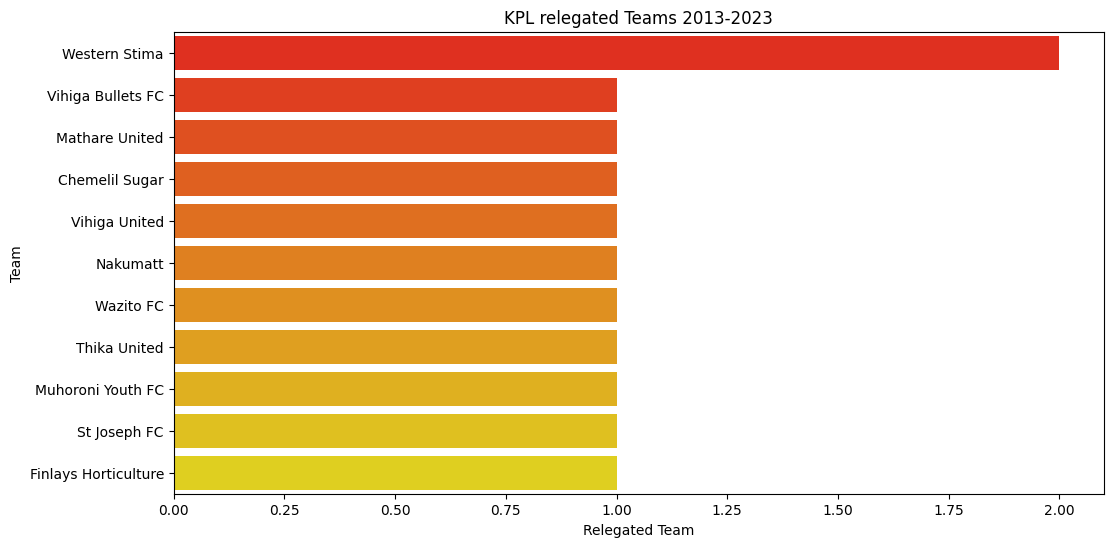

In [16]:
kpl_relegation=kpl_data.loc[(kpl_data['Position']>16)]

relegation=kpl_relegation['Team'].value_counts()
relegation

plt.figure(figsize=(12,6))
sns.barplot(x=relegation,y=relegation.index,palette='autumn')
plt.title("KPL relegated Teams 2013-2023")
plt.xlabel('Relegated Team')
plt.ylabel('Team')

Top scorers across the seasons

In [ ]:
#Nationality of the top 10 scorers across the seasons
kpl_top_scorers['Nationality'].value_counts()

AFC-Leopards position between 2013-2023

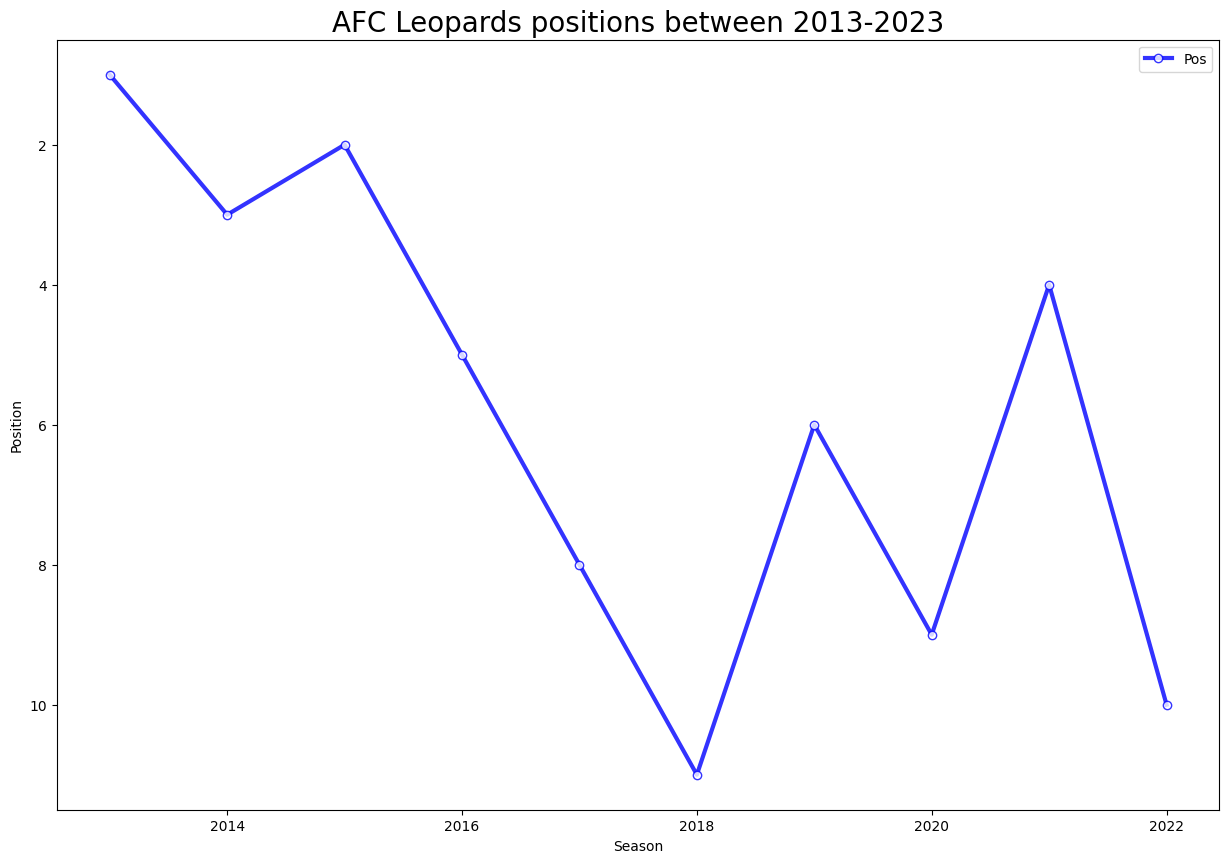

In [34]:

# Sample data (replace with your actual data)
# Ensure both lists have the same length
data = {'Season': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'Position': [1, 3, 2, 5, 8, 11, 6, 9, 4, 10]} # Added more positions to match the number of seasons

# Create a DataFrame
AFC_Leopards_data = pd.DataFrame(data)

# Now you can plot the data
AFC_Leopards_data.plot(x='Season',y='Position',marker='o',ms='6',lw='3',mfc='white',c='blue',alpha=0.8,figsize=(15,10))
plt.xlabel('Season')
plt.ylabel('Position')

plt.title('AFC Leopards positions between 2013-2023',fontsize=20)
plt.legend(['Pos']);
plt.gca().invert_yaxis()
plt.show()

Gor Mahia's Position in the last seasons

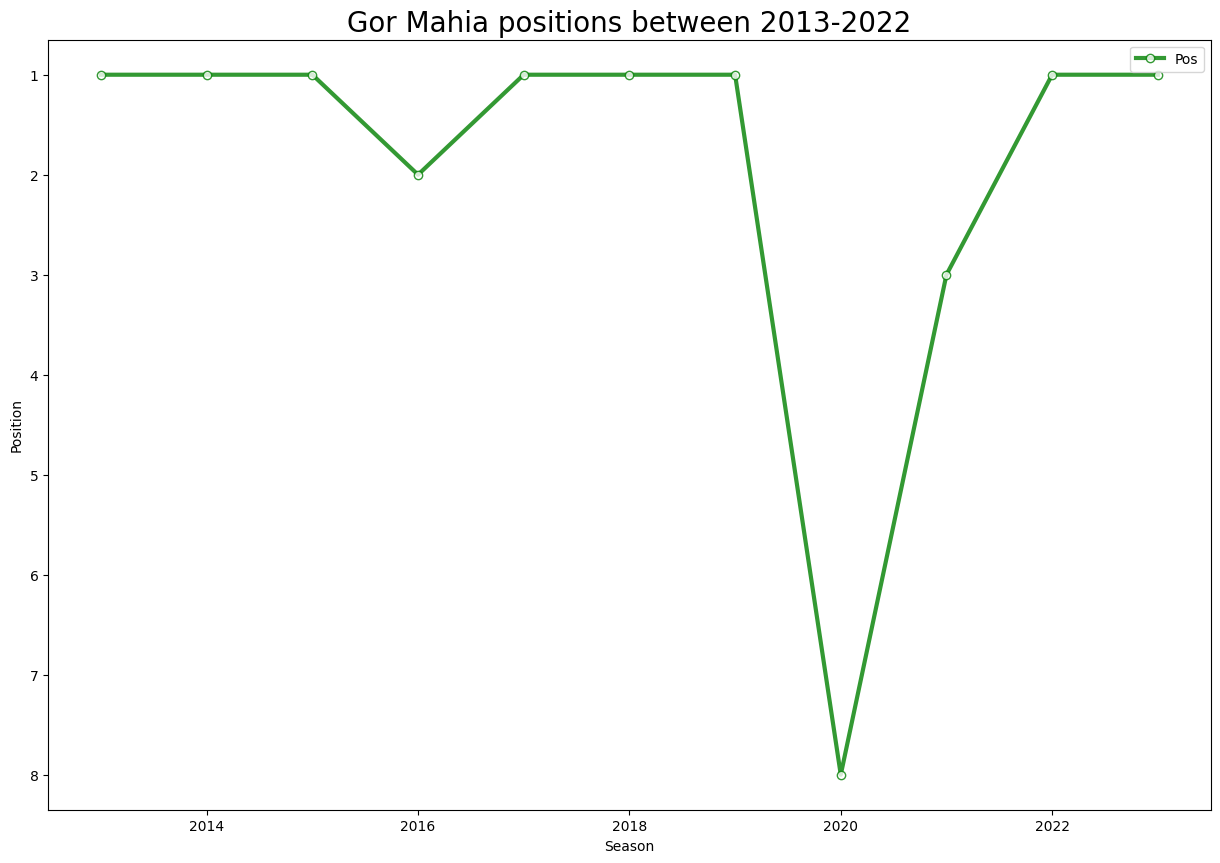

In [42]:

# Sample data for Gor Mahia (replace with your actual data)
# Ensure both lists have the same length
data = {'Season': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,2023],
        'Position': [1, 1, 1, 2, 1, 1, 1, 8, 3, 1, 1]} # Example positions, replace with actual data

# Create a DataFrame
Gor_Mahia_data = pd.DataFrame(data)

# Plot the data
Gor_Mahia_data.plot(x='Season', y='Position', marker='o', ms='6', lw='3', mfc='white', c='green', alpha=0.8, figsize=(15,10))
plt.xlabel('Season')
plt.ylabel('Position')

plt.title('Gor Mahia positions between 2013-2022', fontsize=20)
plt.legend(['Pos']);
plt.gca().invert_yaxis()
plt.show()

Tusker's Position for the last 10 seasons

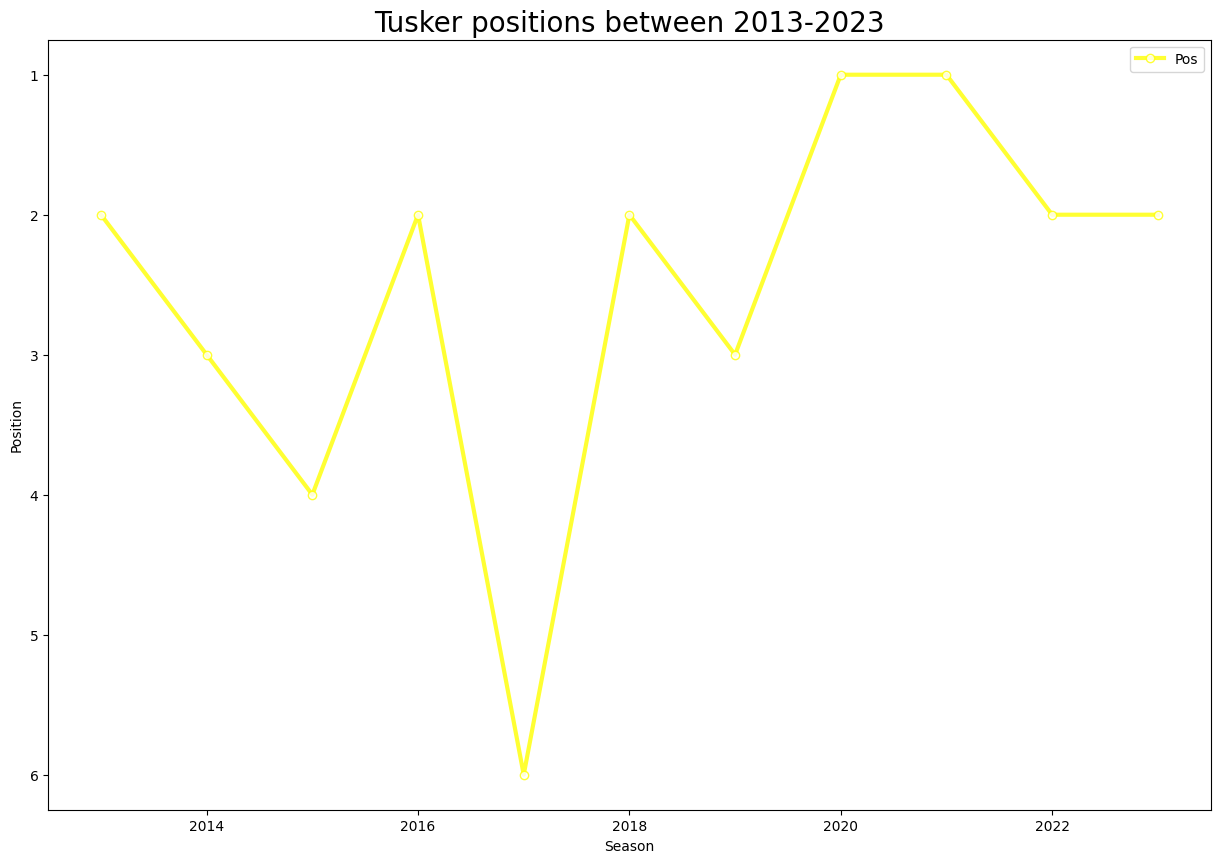

In [41]:
# Sample data for Tusker (replace with your actual data)
# Ensure both lists have the same length
data = {'Season': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
        'Position': [2, 3, 4, 2, 6, 2, 3, 1, 1, 2, 2]}  # Example positions, replace with Tusker's actual data

# Create a DataFrame
Tusker_data = pd.DataFrame(data)

# Plot the data
Tusker_data.plot(x='Season', y='Position', marker='o', ms='6', lw='3', mfc='white', c='yellow', alpha=0.8, figsize=(15,10))
plt.xlabel('Season')
plt.ylabel('Position')

plt.title('Tusker positions between 2013-2023', fontsize=20)
plt.legend(['Pos']);
plt.gca().invert_yaxis()
plt.show()

Top Teams by Goals scored

In [46]:
# Check the column names in your DataFrame
print(kpl_data.columns)

# Assuming 'kpl_data' is your DataFrame and the correct column name is 'Goals_Scored'
# (adjust the column name if necessary)
top_teams_by_goals = kpl_data.sort_values(by='Goals_Score_Avg', ascending=False)

# Print the top 5 teams
print(top_teams_by_goals[['Team', 'Goals_Score_Avg']].head())

Index(['Season', 'Position', 'Team', 'GP', 'PTS', 'W', 'D', 'L', 'G+', 'G-',
       'GD', 'last10matches(Wins)', 'last10matches(Draws)',
       'last10matches(Losses)', 'Goals_Score_Avg', 'Goals_Conceded_Avg'],
      dtype='object')
                 Team  Goals_Score_Avg
70          Gor Mahia         2.088235
36  Kakamega Homeboyz         2.045455
35          Gor Mahia         2.043478
37          Tusker FC         1.863636
52          Gor Mahia         1.735294


In [50]:
print(kpl_top)

        Season  Position                  Team  GP  PTS  W   D   L  G+  G-  \
16   2021/2022        17     Vihiga Bullets FC  34   24  5   9  19  23  60   
17   2021/2022        18        Mathare United  29   11  3   2  24  18  65   
34   2020/2021        17         Western Stima  32   22  4  10  18  31  58   
51   2019/2020        17        Chemelil Sugar  23    9  2   3  18  11  67   
68   2018/2019        17         Vihiga United  34   26  4  14  16  27  48   
69   2018/2019        18              Nakumatt  34   18  5   3  26  31  87   
86        2018        17             Wazito FC  34   31  8   7  19  31  53   
87        2018        18          Thika United  34   23  5   8  21  23  56   
104       2017        17         Western Stima  34   38  9  11  14  31  41   
105       2017        18     Muhoroni Youth FC  35   25  5  10  19  28  66   
138       2015        17          St Joseph FC  30   23  7   2  21  23  47   
139       2015        18  Finlays Horticulture  34   15  3   6  